# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [1]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step1. 下載資料

In [2]:
b_c=datasets.load_breast_cancer()
print(b_c.keys())
print(b_c.feature_names)
print(b_c.target_names)
import pandas as pd
b_c_d=pd.DataFrame(b_c['data'])
b_c_d.columns=b_c['feature_names']
b_c_d

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
b_c_t=pd.DataFrame(b_c['target'])
b_c_t.columns=['malignant/benign']
b_c_t

,malignant/benign
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [4]:
b_c_full=pd.concat([b_c_d,b_c_t],axis=1)
b_c_full

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant/benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


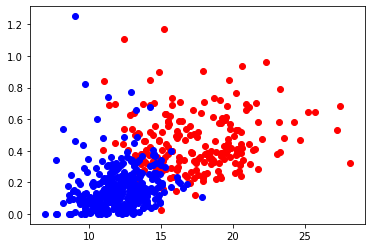

In [5]:
f_a='mean radius'
f_b='worst concavity'
import matplotlib.pyplot as plt
import seaborn as sns
b_c_0=b_c_full[b_c_full['malignant/benign']==0]
b_c_1=b_c_full[b_c_full['malignant/benign']==1]

plt.scatter(b_c_0[f_a],b_c_0[f_b],color='red')
plt.scatter(b_c_1[f_a],b_c_1[f_b],color='blue')

<AxesSubplot:>

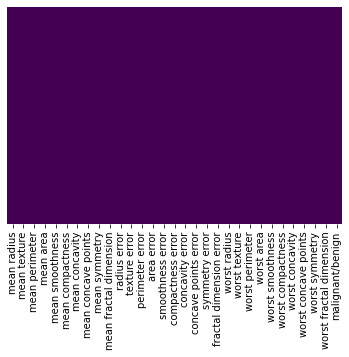

In [6]:
sns.heatmap(b_c_full.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='mean radius', ylabel='count'>

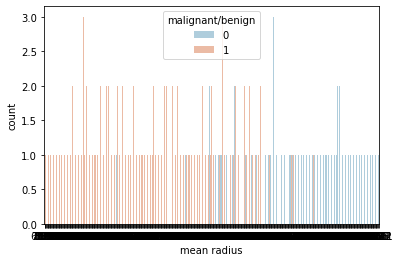

In [7]:
sns.countplot(x='mean radius',hue='malignant/benign',data=b_c_full,palette='RdBu_r')

## Step2. 區分訓練集與測試集

In [8]:
X_train, X_test, y_train, y_test = train_test_split(b_c_full[[f_a,f_b]], b_c_full[['malignant/benign']],test_size=0.3,random_state=0)

In [9]:
print(X_train.head())
print(y_train.head())

     mean radius  worst concavity
478       11.490          0.25960
303       10.490          0.08423
155       12.250          0.19430
186       18.310          0.35380
101        6.981          0.00000
     malignant/benign
478                 1
303                 1
155                 1
186                 0
101                 1


In [10]:
X_train_ar=X_train.to_numpy()
y_train_ar=y_train.to_numpy().ravel()
print(X_train_ar[:10])
print(y_train_ar[:10])

[[11.49     0.2596 ]
 [10.49     0.08423]
 [12.25     0.1943 ]
 [18.31     0.3538 ]
 [ 6.981    0.     ]
 [ 9.787    0.02049]
 [13.08     0.189  ]
 [11.15     0.07116]
 [15.1      0.2712 ]
 [18.63     0.6133 ]]
[1 1 1 0 1 1 1 1 0 0]


## Step3. 建模

In [11]:
b_c_svm=svm.SVC(kernel='poly',gamma='auto',C=100)
b_c_svm.fit(X_train_ar,y_train_ar)


SVC(C=100, gamma='auto', kernel='poly')

## Step4. 預測

```

```


In [12]:
b_c_svm.predict(X_test)

C:\Users\ronal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1])

## Step5. 準確度分析

In [13]:
print(b_c_svm.score(X_train,y_train))
print(b_c_svm.score(X_test, y_test))

0.9195979899497487
0.9181286549707602


C:\Users\ronal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [14]:
import numpy as np
error_index2=np.where(b_c_svm.predict(X_train).reshape(-1,1)!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(b_c_svm.predict(X_test).reshape(-1,1)!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))
print(error_index2)
print(error_index)

train accuracy: 0.9195979899497487
test accuracy: 0.9181286549707602
[ 12  28  51  59  81  84  89  96 125 129 138 151 153 157 160 166 167 176
 209 231 255 282 284 288 305 327 339 340 376 377 380 391]
[ 10  13  32  35  40  44  70  92  97 116 134 151 152 166]


C:\Users\ronal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\ronal\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [15]:
data_index=b_c_full.iloc[error_index].index#這裡變數b_c_full是所有資料
b_c_full.iloc[data_index]#錯誤欄位的正確之原始資料

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant/benign
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452,0
13,15.850,23.95,103.70,782.7,0.08401,0.10020,0.099380,0.053640,0.1847,0.05338,...,27.66,112.00,876.5,0.1131,0.19240,0.23220,0.11190,0.2809,0.06287,0
32,17.020,23.98,112.80,899.3,0.11970,0.14960,0.241700,0.120300,0.2248,0.06382,...,32.09,136.10,1344.0,0.1634,0.35590,0.55880,0.18470,0.3530,0.08482,0
35,16.740,21.59,110.10,869.5,0.09610,0.13360,0.134800,0.060180,0.1896,0.05656,...,29.02,133.50,1229.0,0.1563,0.38350,0.54090,0.18130,0.4863,0.08633,0
40,13.440,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.020310,0.1784,0.05587,...,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146,0
44,13.170,21.81,85.42,531.5,0.09714,0.10470,0.082590,0.052520,0.1746,0.06177,...,29.89,105.50,740.7,0.1503,0.39040,0.37280,0.16070,0.3693,0.09618,0
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,0.05461,...,26.58,165.90,1866.0,0.1193,0.23360,0.26870,0.17890,0.2551,0.06589,0
92,13.270,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.026480,0.1386,0.05318,...,22.35,104.50,830.6,0.1006,0.12380,0.13500,0.10010,0.2027,0.06206,1
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1
116,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722,1


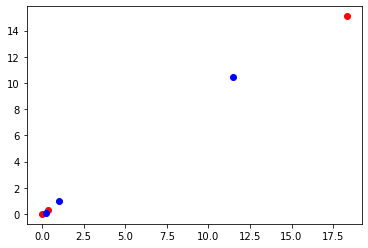

In [28]:
#X_train_ar=X_train.to_numpy()
#y_train_ar=y_train.to_numpy()
#z_train_ar=np.c_[X_train_ar,y_train_ar]

#X_plot_0=z_train_ar[z_train_ar[:,2]==0]
#X_plot_1=z_train_ar[z_train_ar[:,2]==1]

#plt.scatter(X_plot_0[0],X_plot_0[1],color='red')
#plt.scatter(X_plot_1[0],X_plot_1[1],color='blue')
#plt.show()

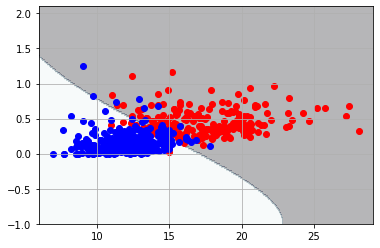

In [38]:
bc_x_min=z_train_ar[:,0].min()-1
bc_x_max=z_train_ar[:,0].max()+1
bc_y_min=z_train_ar[:,1].min()-1
bc_y_max=z_train_ar[:,1].max()+1
grid_interval=0.02
xx,yy=np.meshgrid(np.arange(bc_x_min,bc_x_max,grid_interval),np.arange(bc_y_min,bc_y_max,grid_interval))

Z=b_c_svm.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.3)
plt.autoscale()
plt.grid()
#plt.scatter(X_plot_0[0],X_plot_0[1],color='red')
#plt.scatter(X_plot_1[0],X_plot_1[1],color='blue')
plt.scatter(b_c_0[f_a],b_c_0[f_b],color='red')
plt.scatter(b_c_1[f_a],b_c_1[f_b],color='blue')
plt.show()